    JACOB KNOPPING
    1/29/2020
    
    21.5 CHALLENGE: SUPPORT VECTOR MACHINES

### Introductory Code

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')

In [3]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [4]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

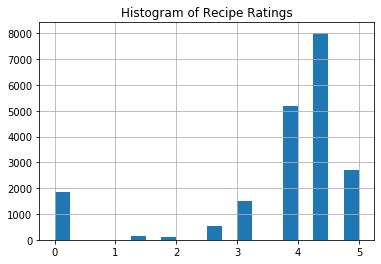

In [5]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [6]:
#Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [7]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = raw_data.rating.sample(frac=0.3, replace=True, random_state=1)
svr.fit(X,Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

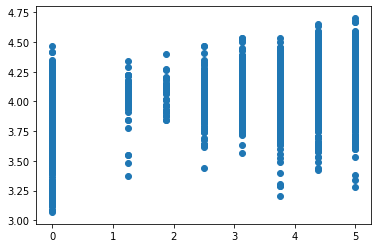

In [8]:
plt.scatter(Y, svr.predict(X))

In [9]:
svr.score(X, Y)

-0.003978314483867651

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

array([-0.01787926, -0.02916288, -0.02841122, -0.03767394, -0.01735362])

### Challenge

Oh dear, so this did seem not to work very well. In fact it is remarkably poor. Now there are many things that we could do here.

Firstly the overfit is a problem, even though it was poor in the first place. We could go back and clean up our feature set. There might be some gains to be made by getting rid of the noise.

We could also see how removing the nulls but including dietary information performs. Though its a slight change to the question we could still possibly get some improvements there.

Lastly, we could take our regression problem and turn it into a classifier. With this number of features and a discontinuous outcome, we might have better luck thinking of this as a classification problem. We could make it simpler still by instead of classifying on each possible value, group reviews to some decided high and low values.

And that is your challenge.

Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

### Solution

__Step 1:__ Starting over by reading into a new dataframe:

In [11]:
ratings_df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')

__Step 2:__ EDA and Feature Engineering

In [12]:
ratings_df.shape

(20052, 680)

In [13]:
null_values = ratings_df.isnull().sum()
amount_null = null_values[null_values > 0]
percent_null = (100*amount_null)/ratings_df.shape[0]
percent_null

calories    20.531618
protein     20.756034
fat         20.860762
sodium      20.541592
dtype: float64

Missing data for these four variables (only variables will null values), is only at 20%. Calories, protein, fat, and sodium may have some explanatory power, so we will keep them for now. This information may have signficance, and filling these null values seems impractical in this particular case. Therefore, rows with missing values will be dropped.

In [14]:
#also dropping title
ratings_df = ratings_df.drop('title', 1)
ratings_df.dropna(inplace=True)

In [15]:
#Double-checking missing values have been handled
null_values = ratings_df.isnull().sum()
amount_null = null_values[null_values > 0]
amount_null

Series([], dtype: int64)

Looking at correlations to see if there are any strong relationships:

In [16]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15864 entries, 0 to 20051
Columns: 679 entries, rating to turkey
dtypes: float64(679)
memory usage: 82.3 MB


All remaining variables are categorical.

In [20]:
columns_list = list(ratings_df.columns)

In [22]:
#Figure out variables correlated with good reviews
corrs = np.abs(ratings_df[columns_list].iloc[:,1:].corr().loc[:,"rating"]).sort_values(ascending=False)
corrs[corrs > 0.10]

KeyError: 'rating'

All correlations are low, making it difficult to extract features based on variables highly correlated with recipe ratings. Luckily, we can instead use sci-kit learns variance threshold for feature selection to help (link: https://scikit-learn.org/stable/modules/feature_selection.html).

In [23]:
from sklearn.feature_selection import VarianceThreshold

#Calculate variance threshold
var_thresh = VarianceThreshold(threshold=(.8 * (1 - .8)))
var_thresh.fit(ratings_df, ratings_df.rating)

VarianceThreshold(threshold=0.15999999999999998)

In [24]:
#filter by variance threshold
ratings_df = ratings_df.loc[:, var_thresh.get_support()]

In [25]:
ratings_df.head(3)

,rating,calories,protein,fat,sodium,bake,bon appétit,gourmet,kosher,peanut free,pescatarian,quick & easy,soy free,summer,tree nut free,vegetarian,wheat/gluten-free
0,2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.375,403.0,18.0,23.0,1439.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.750,165.0,6.0,7.0,165.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
print('Number of features:', len(ratings_df.columns), '\n')
print('List of features:\n', list(ratings_df.columns))

Number of features: 17 

List of features:
 ['rating', 'calories', 'protein', 'fat', 'sodium', 'bake', 'bon appétit', 'gourmet', 'kosher', 'peanut free', 'pescatarian', 'quick & easy', 'soy free', 'summer', 'tree nut free', 'vegetarian', 'wheat/gluten-free']


Based on the variance threshold, 17 features have been selected for the model.

__Step 3:__ Add a binary feature for ratings

In [32]:
ratings_df.rating.describe()

count    15864.000000
mean         3.760952
std          1.285518
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

Interestingly, the median and IQR3 (75th percentile) for recipe ratings have the same value of 4.375. For our purposes, let's use this value as our benchmark for creating binary classifications of recipe ratings, 1 being above that benchmark, 0 being below.

In [33]:
ratings_df['binary_rating'] = np.where(ratings_df.rating > 4.375, 1, 0)

__Step 4:__ Build new SVC Model

In [37]:
#Import Support Vector Classifier (SVC)
from sklearn.svm import SVC

svc = SVC()

X = ratings_df.drop(['binary_rating'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = ratings_df.binary_rating.sample(frac=0.3, replace=True, random_state=1)

svc.fit(X, Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [38]:
score = svc.score(X, Y)
print("Score =", score)

Score = 0.9941164110107166


In [39]:
cvs = cross_val_score(svc, X, Y, cv=5)
print('Cross validation scores:', cvs)
avg_cvs = cvs.mean()
print('Average =', avg_cvs)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Cross validation scores: [0.89821616 0.89821616 0.893796   0.90010515 0.8980021 ]
Average = 0.8976671157438515


Selecting features by variance, and tranforming ratings into a binary classifier went a long way! The accuracy of model went from roughly 0 percent to 90 percent accurate using these techniques.